<a href="https://colab.research.google.com/github/Limonsitox/StephaniF-SSF-oto24-Stehani-Vianey-Francisco-Limon/blob/main/SSF_TAREA1_Oto24Stephani_V_Francisco_Lim%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a)

Vamos a implementar el método de Horner y las variantes mencionadas. El método de Horner es una técnica eficiente para evaluar polinomios de la forma:

P(x)=anxn+an−1xn−1+⋯+a1x+a0

La implementación del método de Horner se realiza reescribiendo el polinomio de manera que se evalúe en forma anidada:

P(x)=((…(an⋅x+an−1)⋅x+an−2)⋅x+⋯+a1)⋅x+a0

Implementación básica del método de Horner en Python

Voy a comenzar con una implementación básica del método de Horner y luego añadiré las variantes según lo solicitado.


In [ ]:
def horner(coef, x):
    result = coef[0]
    for i in range(1, len(coef)):
        result = result * x + coef[i]
    return result

Ejemplos

>1.- Polinomio: P(x)=2x3−6x2+2x−1

•	Coeficientes: [2, -6, 2, -1]

•	Valor de x: 3




>2.-  Polinomio: P(x)=x4+3x3−5x2+2x−7

•	Coeficientes: [1, 3, -5, 2, -7]

•	Valor de x: 2







In [ ]:
# Implementación básica del método de Horner
def horner(coef, x):
    result = coef[0]
    for i in range(1, len(coef)):
        result = result * x + coef[i]
    return result

# Ejemplos
polinomio1 = [2, -6, 2, -1]
polinomio2 = [1, 3, -5, 2, -7]

x1 = 3
x2 = 2

resultado1 = horner(polinomio1, x1)
resultado2 = horner(polinomio2, x2)

print(f"El resultado del polinomio 1 evaluado en x = {x1} es: {resultado1}")
print(f"El resultado del polinomio 2 evaluado en x = {x2} es: {resultado2}")


El resultado del polinomio 1 evaluado en x = 3 es: 5
El resultado del polinomio 2 evaluado en x = 2 es: 17


Variante 1: Implementación recursiva

In [ ]:
def horner_recursive(coef, x, n=None):
    if n is None:
        n = len(coef) - 1
    if n == 0:
        return coef[0]
    return coef[n] + x * horner_recursive(coef, x, n-1)


Ejemplo

Consideremos el polinomio:

P(x)=4x3+3x2−2x+5

Con los coeficientes en orden decreciente de grado, tenemos:

•	Coeficientes: [4,3,−2,5]

•	Vamos a evaluar este polinomio en x=2x

•	utilizando la implementación recursiva.

evaluación del polinomio P(x)=4x3+3x2−2x+5 en x=2x


In [ ]:
# Variante recursiva del método de Horner
def horner_recursive(coef, x, n=None):
    if n is None:
        n = len(coef) - 1  # Inicia con el mayor grado (n = len(coef) - 1)
    if n == 0:  # Caso base: cuando llegamos al término constante
        return coef[0]
    return coef[n] + x * horner_recursive(coef, x, n-1)

# Ejemplo: Polinomio P(x) = 4x^3 + 3x^2 - 2x + 5
coeficientes = [4, 3, -2, 5]
x_val = 2

# Evaluar el polinomio en x = 2 usando la variante recursiva
resultado = horner_recursive(coeficientes, x_val)
print(f"El resultado de P({x_val}) es: {resultado}")


El resultado de P(2) es: 45


Variante 2: Evaluación del polinomio y su derivada


In [ ]:
def horner_derivative(coef, x):
    n = len(coef) - 1
    poly_val = coef[0]
    deriv_val = 0
    for i in range(1, len(coef)):
        deriv_val = deriv_val * x + poly_val
        poly_val = poly_val * x + coef[i]
    deriv_val *= n
    return poly_val, deriv_val


Ejemplo

Consideremos el polinomio:

P(x)=3x4−5x3+2x2−7x+4

Sus coeficientes en orden decreciente de grado son:

•	Coeficientes: [3,−5,2,−7,4]

Vamos a evaluar el polinomio y su derivada en x=1x



In [ ]:
# Variante que evalúa el polinomio y su derivada al mismo tiempo
def horner_derivative(coef, x):
    n = len(coef) - 1
    poly_val = coef[0]
    deriv_val = 0
    for i in range(1, len(coef)):
        deriv_val = deriv_val * x + poly_val
        poly_val = poly_val * x + coef[i]
    deriv_val *= n
    return poly_val, deriv_val

# Ejemplo: Polinomio P(x) = 3x^4 - 5x^3 + 2x^2 - 7x + 4
coeficientes = [3, -5, 2, -7, 4]
x_val = 1

# Evaluar el polinomio y su derivada en x = 1 usando la variante con derivada
resultado_pol, resultado_deriv = horner_derivative(coeficientes, x_val)
print(f"El valor de P({x_val}) es: {resultado_pol}")
print(f"El valor de P'({x_val}) es: {resultado_deriv}")


El valor de P(1) es: -3
El valor de P'(1) es: -24


b)

Evaluación de cos(x)

La serie de Taylor para cos(x) alrededor de x=0 es:


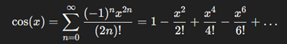

In [ ]:
import math

def cos_taylor_direct(x, tol=1e-4):
    n = 0
    term = 1  # Primer término de la serie
    suma = term
    while abs(term) > tol:
        n += 1
        term = (-1)**n * (x**(2*n)) / math.factorial(2*n)
        suma += term
    return suma, n


Voy a implementar los códigos necesarios para la Parte b, donde se evaluará cos(x) utilizando dos métodos: el cálculo directo de la serie de Taylor y la computación parcial, y luego se compararán los resultados.

Método i: Cálculo Directo de la Serie

implementamos la función cos_taylor_direct que calcula el valor de cos(x) sumando los términos de la serie de Taylor hasta que la diferencia entre términos sucesivos sea menor que una tolerancia dada.




In [ ]:
import math

def cos_taylor_direct(x, tol=1e-4):
    n = 0
    term = 1  # Primer término de la serie
    suma = term
    while abs(term) > tol:
        n += 1
        term = (-1)**n * (x**(2*n)) / math.factorial(2*n)
        suma += term
    return suma, n


Método ii: Computación Parcial

La función cos_taylor_partial también calcula el valor de cos(x), pero optimiza el cálculo reutilizando los resultados de los términos anteriores para mejorar la eficiencia.

In [ ]:
def cos_taylor_partial(x, tol=1e-4):
    n = 0
    term = 1  # Primer término de la serie
    suma = term
    while abs(term) > tol:
        n += 1
        term *= -x**2 / ((2*n) * (2*n - 1))  # Utiliza el término anterior para calcular el siguiente
        suma += term
    return suma, n


Comparación de Convergencia

Vamos a evaluar cos(x) para diferentes valores de x utilizando ambos métodos y comparando los resultados. Aquí también calcularemos el error relativo comparando con el valor real de cos(x) obtenido con math.cos(x).

In [ ]:
# Valores de x a evaluar
x_values = [0.5, 100]
tolerances = [1e-4, 1e-8]

# Tabla de resultados
print(f"{'x':>5} {'Método':>10} {'Iteraciones':>12} {'Aproximación':>15} {'Error Relativo':>15}")
for x in x_values:
    for tol in tolerances:
        cos_direct, n_direct = cos_taylor_direct(x, tol)
        cos_partial, n_partial = cos_taylor_partial(x, tol)
        cos_real = math.cos(x)

        error_direct = abs((cos_direct - cos_real) / cos_real)
        error_partial = abs((cos_partial - cos_real) / cos_real)
        print(f"{x:>5} {'Directo':>10} {n_direct:>12} {cos_direct:>15.10f} {error_direct:>15.10f}")
        print(f"{x:>5} {'Parcial':>10} {n_partial:>12} {cos_partial:>15.10f} {error_partial:>15.10f}")


    x     Método  Iteraciones    Aproximación  Error Relativo
  0.5    Directo            3    0.8775824653    0.0000001101
  0.5    Parcial            3    0.8775824653    0.0000001101
  0.5    Directo            5    0.8775825619    0.0000000000
  0.5    Parcial            5    0.8775825619    0.0000000000
  100    Directo          139 -40232524195277553455333376.0000000000 46656202813401163781636096.0000000000
  100    Parcial          139 -119404595179383281007198208.0000000000 138469189318110995233636352.0000000000
  100    Directo          144 -40232524195277553455333376.0000000000 46656202813401163781636096.0000000000
  100    Parcial          144 -119404595179383281007198208.0000000000 138469189318110995233636352.0000000000


C)

 Gráfica del Diagrama de Hertzsprung-Russell

 En esta parte, se busca reproducir la gráfica del diagrama de Hertzsprung-Russell (HR) utilizando un conjunto de datos de estrellas. El diagrama HR es una herramienta fundamental en la astronomía para clasificar las estrellas según su luminosidad y temperatura superficial.

In [ ]:
import numpy as np

# Cargar los datos desde stars.dat
# Suponemos que el archivo contiene dos columnas: tipo_espectral y magnitud_absoluta
data = np.loadtxt('stars.dat', dtype=float, delimiter=',')
tipo_espectral = data[:, 0]  # Primera columna para el tipo espectral (temperatura)
magnitud_absoluta = data[:, 1]  # Segunda columna para la magnitud absoluta (luminosidad)
import pylab as plt

# Graficar el Diagrama HR con pylab
plt.figure()
plt.scatter(tipo_espectral, magnitud_absoluta, c='blue', marker='o')
plt.gca().invert_xaxis()  # Invertir el eje x para mostrar temperaturas decrecientes
plt.gca().invert_yaxis()  # Invertir el eje y porque las magnitudes más bajas son más brillantes
plt.title('Diagrama de Hertzsprung-Russell')
plt.xlabel('Tipo Espectral (Temperatura)')
plt.ylabel('Magnitud Absoluta (Luminosidad)')
plt.show()
import matplotlib.pyplot as plt

# Graficar el Diagrama HR sin usar pylab
plt.figure()
plt.scatter(tipo_espectral, magnitud_absoluta, c='blue', marker='o')
plt.gca().invert_xaxis()  # Invertir el eje x para mostrar temperaturas decrecientes
plt.gca().invert_yaxis()  # Invertir el eje y porque las magnitudes más bajas son más brillantes
plt.title('Diagrama de Hertzsprung-Russell')
plt.xlabel('Tipo Espectral (Temperatura)')
plt.ylabel('Magnitud Absoluta (Luminosidad)')
plt.show()


FileNotFoundError: stars.dat not found.

Parte D: Datos de Alturas de Hombres Mexicanos

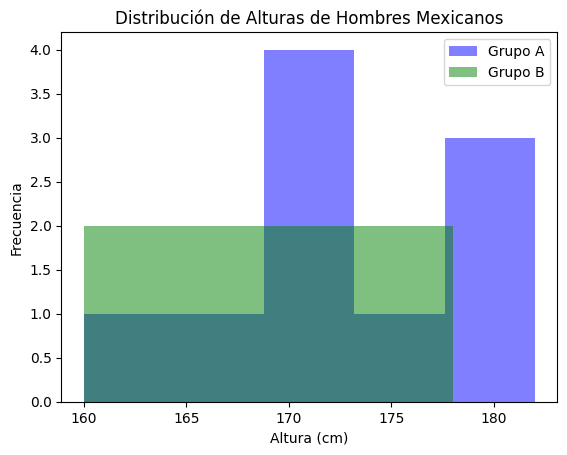

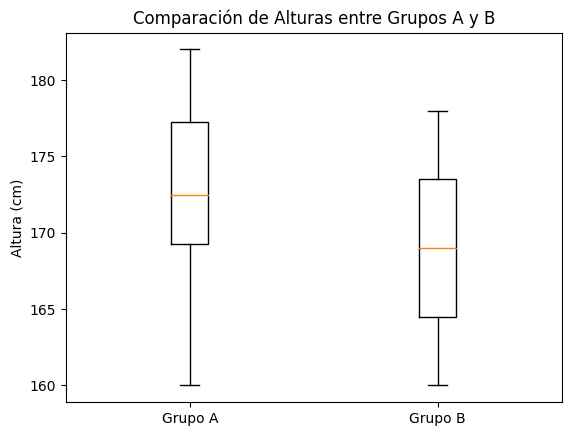

In [ ]:
import numpy as np

# Ejemplo de datos de alturas en cm
alturas_A = np.array([165, 170, 172, 160, 175, 178, 180, 182, 169, 173])
alturas_B = np.array([160, 162, 164, 166, 168, 170, 172, 174, 176, 178])
import matplotlib.pyplot as plt

plt.figure()
plt.hist(alturas_A, bins=5, alpha=0.5, label='Grupo A', color='blue')
plt.hist(alturas_B, bins=5, alpha=0.5, label='Grupo B', color='green')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alturas de Hombres Mexicanos')
plt.legend()
plt.show()
plt.figure()
plt.boxplot([alturas_A, alturas_B], labels=['Grupo A', 'Grupo B'])
plt.ylabel('Altura (cm)')
plt.title('Comparación de Alturas entre Grupos A y B')
plt.show()
